In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
from joblib import dump #Save

---
## One-Hot Encoding

In [11]:
data = pd.read_csv('../dataset/app_dum.csv')

In [12]:
data.columns

Index(['Unnamed: 0', 'Available_Age', 'Size', 'Price', 'Free', 'Rating',
       'Reviews', 'Category_Book', 'Category_Business',
       'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers',
       'Category_Travel', 'Category_Utilities', 'Category_Weather'],
      dtype='object')

### 데이터 살펴보기

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546056 entries, 0 to 546055
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       546056 non-null  int64  
 1   Available_Age                    546056 non-null  int64  
 2   Size                             546056 non-null  int64  
 3   Price                            546056 non-null  int64  
 4   Free                             546056 non-null  bool   
 5   Rating                           546056 non-null  float64
 6   Reviews                          546056 non-null  int64  
 7   Category_Book                    546056 non-null  bool   
 8   Category_Business                546056 non-null  bool   
 9   Category_Developer Tools         546056 non-null  bool   
 10  Category_Education               546056 non-null  bool   
 11  Category_Entertainment           546056 non-null  bool   
 12  Ca

In [14]:
data.duplicated().any() # 중복없음.

False

In [15]:
data['Rating'].value_counts() # 데이터가 0, 5점에 많이 몰려있음.

Rating
5.00    184321
1.00     34169
3.00     27035
4.00     24609
4.50     10849
         ...  
1.06         9
1.04         9
1.05         7
1.03         2
1.02         1
Name: count, Length: 400, dtype: int64

In [16]:
# data.drop(['Unnamed: 0','Category_0','Category_1','Category_2','Category_3','Category_4'], axis=1).boxplot()
# # 1.Reviews 2.Size 3.Price 순으로 수치의 차이가 크다.

In [17]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # 리뷰수
# axes[0].pie(data['Reviews'], labels=data['Reviews'].index, autopct='%1.1f%%', startangle=90)
# axes[0].set_title('리뷰수')
# # 파일크기
# axes[1].pie(data['Size'], labels=data['Size'].index, autopct='%1.1f%%', startangle=90)
# axes[1].set_title('파일크기(MB)')
# # 가격
# axes[2].pie(data['Price'], labels=data['Price'].index, autopct='%1.1f%%', startangle=90)
# axes[2].set_title('가격')

# plt.tight_layout()
# plt.show()

- Rating 0점,5점 등에 편향
- Reveiws, Size, Price 순으로 편향되어 있음.

In [18]:
X = data.drop(['Rating','Unnamed: 0'], axis=1)
y = data['Rating']

In [19]:
X,y

(        Available_Age  Size  Price   Free  Reviews  Category_Book  \
 0                   1    13      0   True        1           True   
 1                   4    25      0   True     1285           True   
 2                   4    60      0   True     1839           True   
 3                   1     3      2  False      242          False   
 4                   4     2      1  False       21           True   
 ...               ...   ...    ...    ...      ...            ...   
 546051              1    39      0   True        1          False   
 546052              1    92      0   True        7          False   
 546053              1    16      0   True      143          False   
 546054              1    37      0   True     1500          False   
 546055              1    16      0   True        1          False   
 
         Category_Business  Category_Developer Tools  Category_Education  \
 0                   False                     False               False   
 1    

In [20]:
std_scaler = StandardScaler().fit_transform(X)
minmax_scaler = MinMaxScaler().fit_transform(X)
robust_scaler = RobustScaler().fit_transform(X)

std_scaled_df = pd.DataFrame(std_scaler, columns=X.columns)
minmax_scaled_df = pd.DataFrame(minmax_scaler, columns=X.columns)
robust_scaled_df = pd.DataFrame(robust_scaler, columns=X.columns)

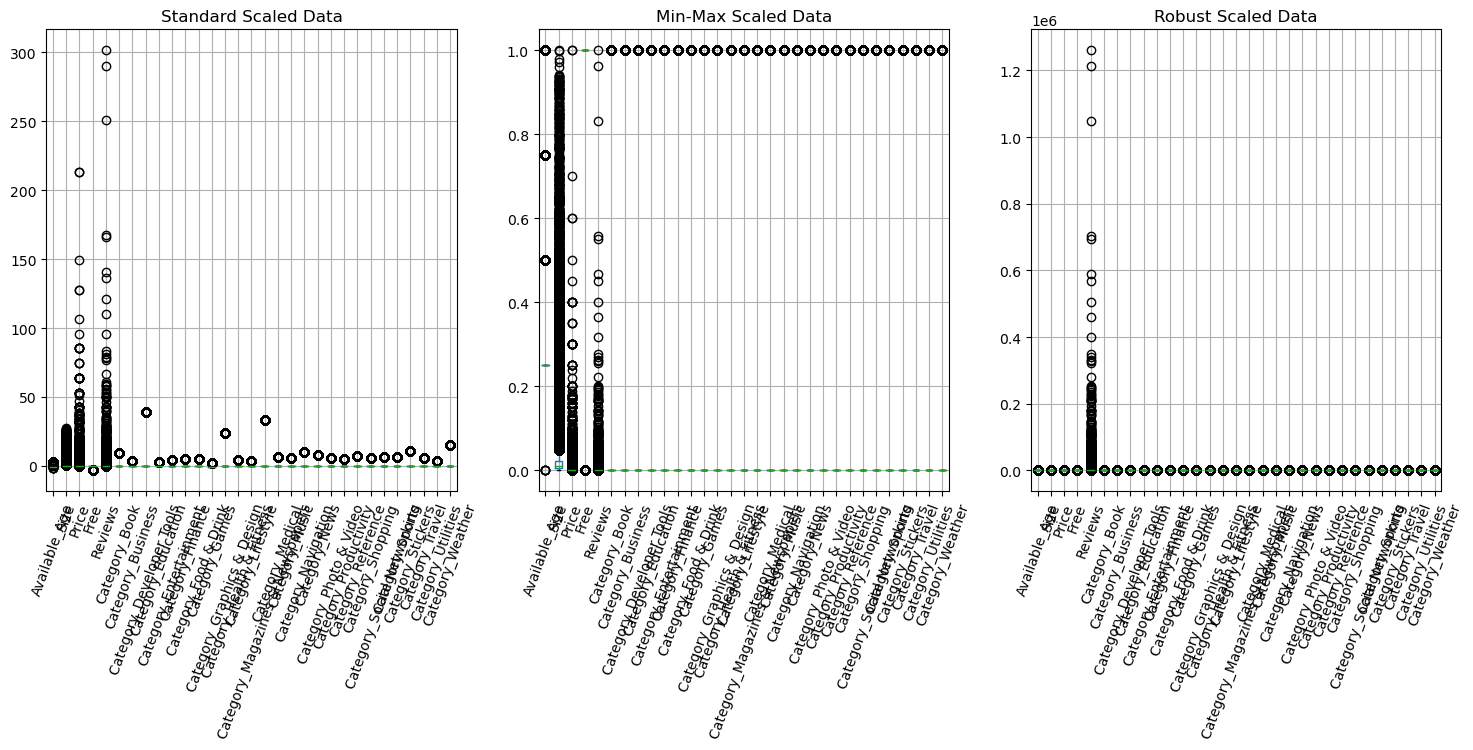

In [21]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Standard Scaled Data')
std_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 2)
plt.title('Min-Max Scaled Data')
minmax_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 3)
plt.title('Robust Scaled Data')
robust_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.show()

In [22]:
robust_scaled_df
robust_scaled_df.columns

Index(['Available_Age', 'Size', 'Price', 'Free', 'Reviews', 'Category_Book',
       'Category_Business', 'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers',
       'Category_Travel', 'Category_Utilities', 'Category_Weather'],
      dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df, y,
                                                    test_size=0.2,
                                                    random_state=13
                                                    )

In [24]:
# 모델 준비
LR_model = LinearRegression()
# SVR_model = SVR(kernel='linear', C=1, epsilon=0.1) # param조정
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()

In [25]:
# 피팅
LR_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# SVR_model.fit(X_train, y_train)

In [27]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [30]:
# 예측
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
# y_pred_svr = SVR_model.predict(X_test)

In [31]:
# Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"MSE : {mse_lr:.4f}")

RMSE : 1.1832
MAE : 0.9430
MSE : 1.3999


In [32]:
# RandomForest
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print(f"RMSE : {rmse_rfr:.4f}")
print(f"MAE : {mae_rfr:.4f}")
print(f"MSE : {mse_rfr:.4f}")

RMSE : 1.2283
MAE : 0.9325
MSE : 1.5088


In [33]:
# DecisionTreeRegression
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f"RMSE : {rmse_dtr:.4f}")
print(f"MAE : {mae_dtr:.4f}")
print(f"MSE : {mse_dtr:.4f}")

RMSE : 1.3475
MAE : 1.0057
MSE : 1.8157


In [34]:
# Gradient Boosting Regression
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"RMSE : {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"MSE : {mse_gbr:.4f}")

RMSE : 1.1628
MAE : 0.9150
MSE : 1.3521


In [35]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'RMSE':rmse_lr,'MSE':mse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'RMSE': rmse_rfr,'MSE':mse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'RMSE': rmse_dtr,'MSE':mse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'RMSE': rmse_gbr,'MSE':mse_gbr}
}
result = pd.DataFrame(metrics).round(3).T
result
    

,MAE,RMSE,MSE
Linear Reg,0.943,1.183,1.400
Random Forest Reg,0.933,1.228,1.509
Decision Tree Reg,1.006,1.347,1.816
Gradient Boosting Reg,0.915,1.163,1.352


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


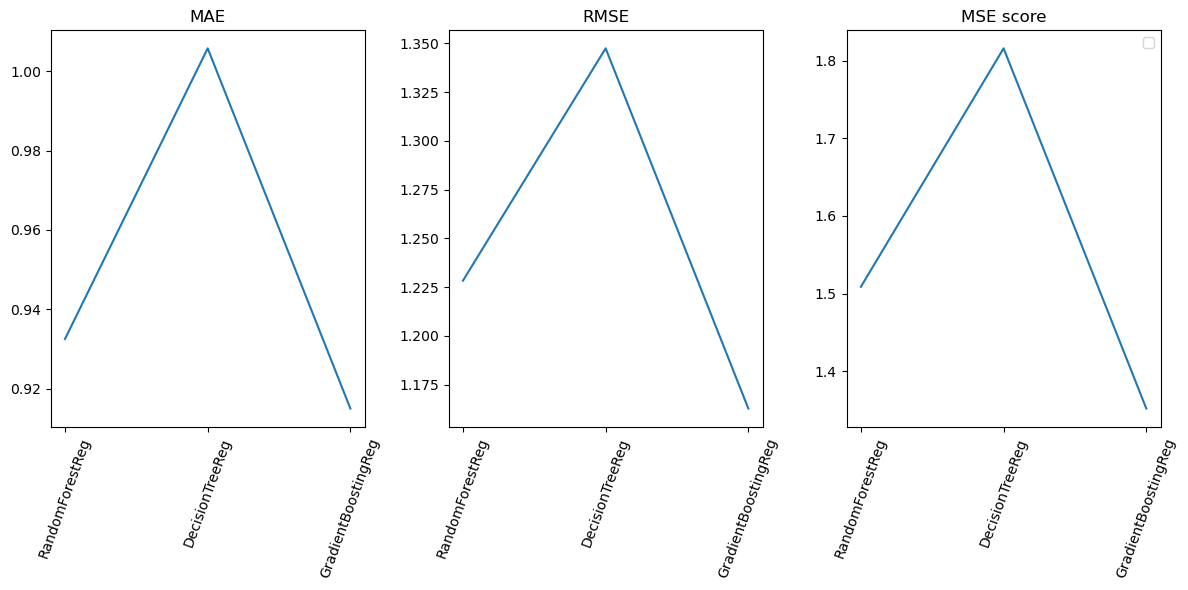

In [36]:
model = ['RandomForestReg','DecisionTreeReg', 'GradientBoostingReg']
mae = [mae_rfr,mae_dtr,mae_gbr]
rmse = [rmse_rfr,rmse_dtr,rmse_gbr]
mse = [mse_rfr,mse_dtr,mse_gbr]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(model,mae)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,3,2)
plt.plot(model,rmse)
plt.title('RMSE')
plt.xticks(rotation=70)

plt.subplot(1,3,3)
plt.plot(model, mse)
plt.title('MSE score')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
# 교차 검증 
kf = KFold(n_splits=5)
total = 0

for train, valid in kf.split(X):
    X_train, X_valid = X.iloc[train], X.iloc[valid]
    y_train, y_vaild = y.iloc[train], y.iloc[valid]

    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_vaild, y_pred)
    mse = mean_squared_error(y_vaild, y_pred)
    total += rmse
    print(f'RMSE : {rmse:.3f}  ', end='')
    print(f'MAE : {mae:.3f}  ', end='')
    print(f'MSE : {mse:.3f}')

print(f'MSE Avg : {total/5}')

RMSE : 1.180  MAE : 0.937  MSE : 1.392
RMSE : 1.158  MAE : 0.910  MSE : 1.341
RMSE : 1.112  MAE : 0.873  MSE : 1.237
RMSE : 1.137  MAE : 0.902  MSE : 1.293
RMSE : 1.223  MAE : 0.978  MSE : 1.496
MSE Avg : 1.1619776066186067


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3,4,5]
}

gridserch = GridSearchCV(estimator=GBR_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
gridserch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [39]:
print(gridserch.best_params_)
print(gridserch.best_score_)
print(gridserch.best_estimator_)

{'max_depth': 5, 'n_estimators': 200}
0.05411411012147149
GradientBoostingRegressor(max_depth=5, n_estimators=200)


In [41]:
model_tuned = GradientBoostingRegressor(n_estimators=200, max_depth=5)
model_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [42]:
y_pred_tuned = model_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print(f'Final MSE : {mse_tuned}')
print(f'Final MAE : {mae_tuned}')

Final MSE : 1.7315121966319644
Final MAE : 1.134783970296917


In [43]:
result = {
    'GBR_before': {'MSE': mse_gbr, 'MAE': mae_gbr},
    'GBR_tuned': {'MSE': mse_tuned, 'MAE': mae_tuned}
}

res = pd.DataFrame(result).round(3)
res

,GBR_before,GBR_tuned
MSE,1.352,1.732
MAE,0.915,1.135


In [ ]:
# from bokeh.plotting import figure, show

# fruits = ['Apples', 'Pears', 'Kiwis', 'Plums', 'Bananas', 'Strawberries']
# counts = [5,3,6,2,7,10]

# # Sort Values
# sorted_fruits = sorted(fruits, key=lambda x: counts[fruits.index(x)])

# p = figure(x_range=sorted_fruits, height=250, title="Counting Fruits", toolbar_location=None, tools="")

# p.vbar(x=fruits, top=counts, width=0.95)
# p.y_range.start = 0
# p.xgrid.grid_line_color=None
# show(p)